In [2]:
import numpy as np
from scipy.linalg import cholesky
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skewstudent import SkewStudent

In [3]:
nscen = 100000
# x1 = np.random.normal(size=nscen)
skewt = SkewStudent(eta=8, lam=-0.5)
x1 = skewt.rvs(nscen)
x2 = np.random.normal(size=nscen)
marginals = np.stack([x1, x2], axis=0)
display(marginals, np.cov(marginals), np.corrcoef(marginals))

array([[ 1.86607423,  0.84659203, -2.18134754, ...,  0.06519385,
        -0.60849151,  0.30748107],
       [-0.34033338, -0.34784044, -0.58076043, ...,  0.56826764,
        -0.19718043,  0.9650057 ]])

array([[ 9.97458461e-01, -4.32811172e-05],
       [-4.32811172e-05,  9.97522758e-01]])

array([[ 1.00000000e+00, -4.33899996e-05],
       [-4.33899996e-05,  1.00000000e+00]])

In [4]:
rho = -0.4
covar_mat = np.array([[1, rho], [rho, 1]])
chol = cholesky(covar_mat, lower=True)
corr_rands = chol @ marginals
display(corr_rands, np.cov(corr_rands), np.corrcoef(corr_rands))

array([[ 1.86607423,  0.84659203, -2.18134754, ...,  0.06519385,
        -0.60849151,  0.30748107],
       [-1.05835039, -0.65743784,  0.34026329, ...,  0.49474835,
         0.06267775,  0.76144991]])

array([[ 0.99745846, -0.39902305],
       [-0.39902305,  0.9975442 ]])

array([[ 1.        , -0.40002258],
       [-0.40002258,  1.        ]])

/Users/philfeihuang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Marginal 1'),
 Text(0, 0.5, 'Marginal 2'),
 Text(0.5, 1.0, 'Correlation = -0.4')]

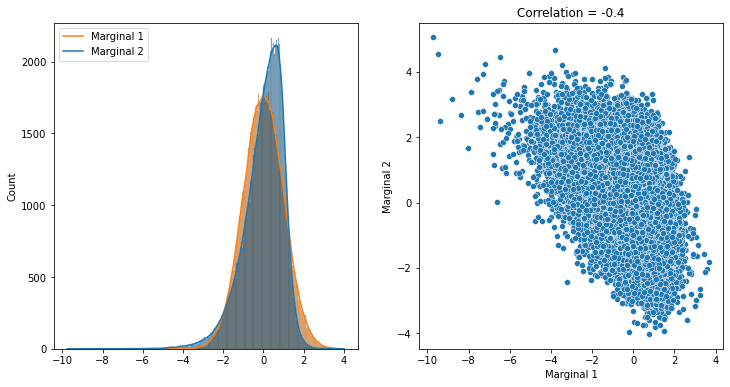

In [5]:
# sns.set(); sns.set_context('notebook')
fig, axes = plt.subplots(1, 2, figsize=(12,6))
sns.histplot([marginals[0], marginals[1]], ax=axes[0], kde=True)
axes[0].legend(['Marginal 1', 'Marginal 2'])
sns.scatterplot(corr_rands[0], corr_rands[1], ax=axes[1])
axes[1].set(xlabel='Marginal 1', ylabel='Marginal 2', title=f'Correlation = {rho}')
# axes[1].scatter(corr_rands[0], corr_rands[1])